# meng 21200 pset 2

### init

In [1195]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from scipy.optimize import curve_fit
import copy

### problem 1

a

In [1196]:
# f'(x) = -2e^(-2x) - 1
tv = -2 * math.exp(-4) - 1
tvs = [tv for i in range(100)]
tv

-1.0366312777774684

b

In [1197]:
def f(x):
    return math.exp(-2 * x) - x
x = np.linspace(0.01, 0.5, 100)

Text(0.5, 1.0, 'centered')

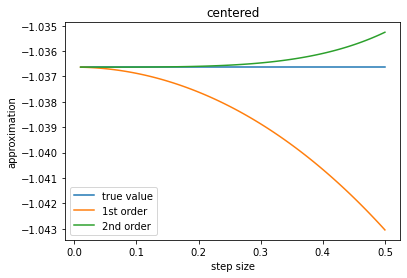

In [1198]:
y1c = [(f(2 + i) - f(2 - i)) / (2 * i) for i in x]
y2c = [(-f(2 + 2 * i) + 8 * f(2 + i) - 8 * f(2 - i) + f(2 - 2 * i)) / (12 * i) for i in x]

plt.plot(x, tvs, label='true value')
plt.plot(x, y1c, label='1st order')
plt.plot(x, y2c, label='2nd order')
plt.legend(loc='best')
plt.ylabel('approximation')
plt.xlabel('step size')
plt.title('centered')

c

In [1199]:
y1f = [(f(2 + i) - f(2)) / i for i in x]
y2f = [(-f(2 + 2 * i) + 4 * f(2 + i) - 3 * f(2)) / (2 * i) for i in x]

y1b = [(f(2) - f(2 - i)) / i for i in x]
y2b = [(f(2 - 2 * i) - 4 * f(2 - i) + 3 * f(2)) / (2 * i) for i in x]

Text(0.5, 1.0, '1st order')

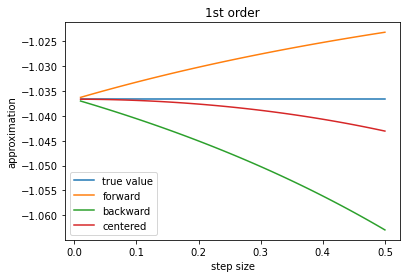

In [1200]:
plt.plot(x, tvs, label='true value')
plt.plot(x, y1f, label='forward')
plt.plot(x, y1b, label='backward')
plt.plot(x, y1c, label='centered')
plt.legend(loc='best')
plt.ylabel('approximation')
plt.xlabel('step size')
plt.title('1st order')

Text(0.5, 1.0, '2nd order')

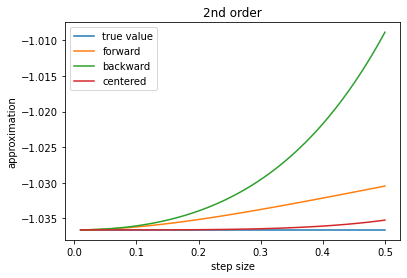

In [1201]:
plt.plot(x, tvs, label='true value')
plt.plot(x, y2f, label='forward')
plt.plot(x, y2b, label='backward')
plt.plot(x, y2c, label='centered')
plt.legend(loc='best')
plt.ylabel('approximation')
plt.xlabel('step size')
plt.title('2nd order')

Text(0.5, 0, 'step size')

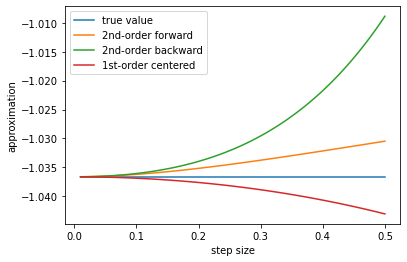

In [1202]:
plt.plot(x, [tv for i in range(100)], label='true value')
plt.plot(x, y2f, label='2nd-order forward')
plt.plot(x, y2b, label='2nd-order backward')
plt.plot(x, y1c, label='1st-order centered')
plt.legend(loc='best')
plt.ylabel('approximation')
plt.xlabel('step size')

1st-order centered seems as accurate as 2nd-order forward and more accurate than 2nd-order backward

1st-order centered produced approximations under the true value, while the other two methods produced approximations above the true value

d

Text(0.5, 24.0, 'step size')

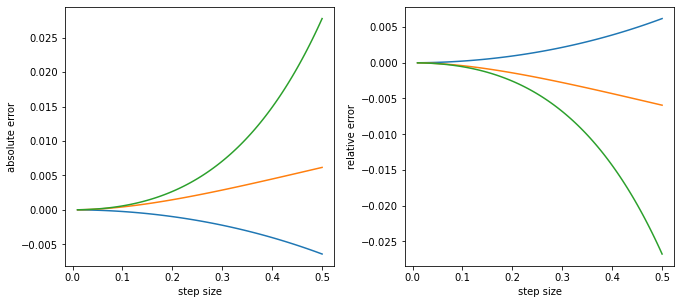

In [1203]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.tight_layout(pad=4)

ax1.plot(x, [y1c[i] - tv for i in range(100)], label='1st-order centered')
ax1.plot(x, [y2f[i] - tv for i in range(100)], label='2nd-order forward')
ax1.plot(x, [y2b[i] - tv for i in range(100)], label='2nd-order backward')
ax1.set_ylabel('absolute error')
ax1.set_xlabel('step size')

ax2.plot(x, [(y1c[i] - tv) / tv for i in range(100)], label='1st-order centered')
ax2.plot(x, [(y2f[i] - tv) / tv for i in range(100)], label='2nd-order forward')
ax2.plot(x, [(y2b[i] - tv) / tv for i in range(100)], label='2nd-order backward')
ax2.set_ylabel('relative error')
ax2.set_xlabel('step size')

At the n-th order approximation, errors of forward and backward approximations are functions of h^n, while error of centered approximation is a function of h^2n

### problem 2

Data points aren't evenly spaced, so will use h = average space

Note that second-order approximations produce less data points, since we need to use two forward data points rather than one

In [1204]:
h = 4.87 / 8

x = [153, 185, 208, 249, 261, 271, 273, 290, 318]
t = [0, 0.52, 1.04, 1.75, 2.37, 3.25, 3.83, 4.35, 4.87]

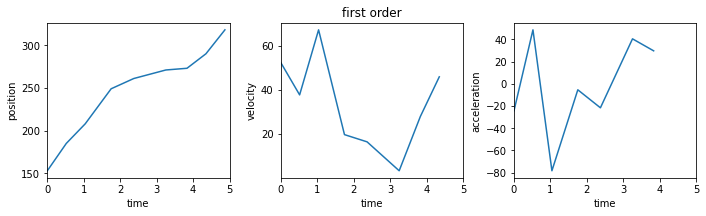

In [1205]:
v1 = [(x[i + 1] - x[i]) / h for i in range(8)]
a1 = [(v1[i + 1] - v1[i]) / h for i in range(7)]

fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

plt.tight_layout(pad=2)
ax1.set_ylabel('position')
ax2.set_ylabel('velocity')
ax3.set_ylabel('acceleration')
ax1.set_xlabel('time')
ax2.set_xlabel('time')
ax3.set_xlabel('time')
ax1.set_xlim([0, 5])
ax2.set_xlim([0, 5])
ax3.set_xlim([0, 5])
ax2.set_title('first order')

ax1.plot(t, x)
ax2.plot(t[:8], v1)
ax3.plot(t[:7], a1)

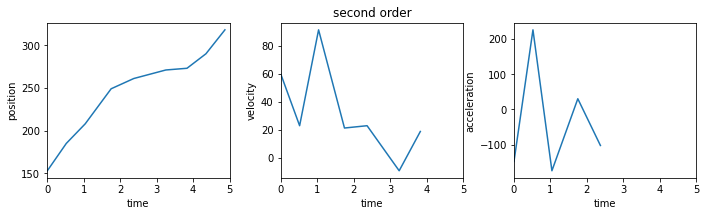

In [1206]:
v2 = [(-x[i + 2] + 4 * x[i + 1] - 3 * x[i]) / (2 * h) for i in range(7)]
a2 = [(-v2[i + 2] + 4 * v2[i + 1] - 3 * v2[i]) / (2 * h) for i in range(5)]

fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(10)
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

plt.tight_layout(pad=2)
ax1.set_ylabel('position')
ax2.set_ylabel('velocity')
ax3.set_ylabel('acceleration')
ax1.set_xlabel('time')
ax2.set_xlabel('time')
ax3.set_xlabel('time')
ax1.set_xlim([0, 5])
ax2.set_xlim([0, 5])
ax3.set_xlim([0, 5])
ax2.set_title('second order')

ax1.plot(t, x)
ax2.plot(t[:7], v2)
ax3.plot(t[:5], a2)

### problem 3

a

Text(603.9818181818181, 0.5, 'y (μm)')

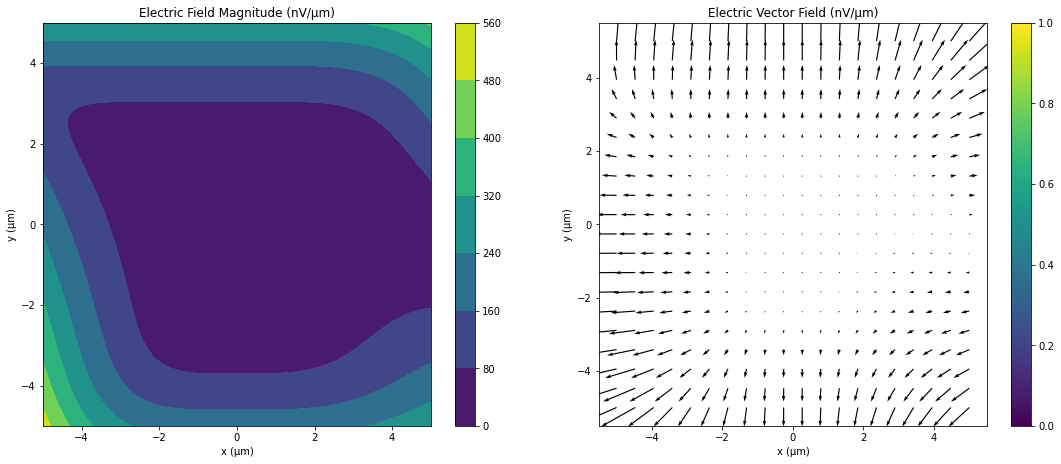

In [1207]:
def p(x, n):
    return np.power(x, n)
def e(y, x):
    u = p(x, 3) - 4 * p(x, 2) + 2 * p(x, 2) * y
    v = 2 * p(y, 3) + 2 * p(y, 2) + 1.5 * y
    return math.sqrt(p(u, 2) + p(v, 2)), u, v
magE = [[0] * 100 for i in range(100)]
u = [[0] * 20 for i in range(20)]
v = copy.deepcopy(u)

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
a = np.linspace(-5, 5, 20)
b = np.linspace(-5, 5, 20)

for i in range(100):
    for j in range(100):
        magE[i][j], _, _ = e(x[i], y[j])
for i in range(20):
    for j in range(20):
        _, u[i][j], v[i][j] = e(a[i], b[j])

fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(16)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plt.tight_layout(pad=4)

cp = ax1.contourf(x, y, magE)
fig.colorbar(cp, ax=ax1)
ax1.set_title('Electric Field Magnitude (nV/μm)')
ax1.set_xlabel('x (μm)')
ax1.set_ylabel('y (μm)')

vf = ax2.quiver(a, b, u, v)
fig.colorbar(vf, ax=ax2)
ax2.set_title('Electric Vector Field (nV/μm)')
ax2.set_xlabel('x (μm)')
ax2.set_ylabel('y (μm)')

Within the domain, the electric field peaks at 560 nV/μm, or 0.56 V/m. Compared to Earth's electric field, which is about 150 V/m of the surface, this field is very weak.

b

In [1208]:
def X(x, y):
    return p(x, 3) - 4 * p(x, 2) + 2 * p(x, 2) * y
def Y(x, y):
    return 2 * p(y, 3) + 2 * p(y, 2) + 1.5 * y

Text(0, 0.5, 'y')

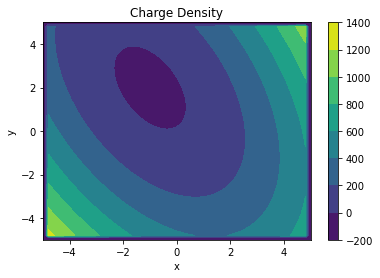

In [1209]:
h = 0.1
epsilon = 3.9
rho = [[0] * 100 for i in range(100)]
for i in range(2, 98):
    for j in range(2, 98):
        ex = (-X(x[i + 2], y[j]) + 8 * X(x[i + 1], y[j]) - 8 * X(x[i - 1], y[j]) + X(x[i - 2], y[j])) / (12 * h)
        ey = (-Y(x[i], y[j + 2]) + 8 * Y(x[i], y[j + 1]) - 8 * Y(x[i], y[j - 1]) + Y(x[i], y[j - 2])) / (12 * h)
        rho[i][j] = (ex + ey) * epsilon

fig, ax = plt.subplots(1,1)
cp = ax.contourf(x, y, rho)
fig.colorbar(cp)
ax.set_title('Charge Density')
ax.set_xlabel('x')
ax.set_ylabel('y')

### problem 4

a

In [1210]:
t = []
c = []
t.append([1.2,19.6,28.2,40.4,50.2,60.0])
c.append([1.7,1.7,3.6,11.2,22.2,44.7])
t.append([13.5,25.7,34.2,44.1,55.1,58.8])
c.append([0.16,1.2,5.2,9.9,31.3,39.9])
t.append([4.9,11,26.9,36.7,47.8,53.9])
c.append([2.5,2.7,4.7,4.7,15.8,28.8])
t.append([2.4,18.4,29.4,38,42.9,57.6])
c.append([0.3,1.6,3.2,9,15.7,40])
t.append([6.1,24.5,31.9,39.2,45.3,52.7])
c.append([1.2,5.1,5.3,6.7,16.8,25.4])
t.append([8.6,22,33.1,41.6,51.4,56.3])
c.append([2.5,6.7,7.2,11.8,23.1,36.3])
colours = ['green', 'red', 'yellow', 'blue', 'orange', 'purple']

Text(0.5, 0, 'Time (hours)')

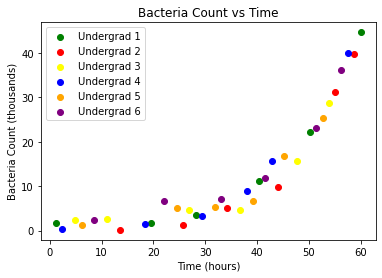

In [1211]:
for i in range(6):
    plt.scatter(t[i], c[i], c=colours[i], label=f'Undergrad {i + 1}')
plt.legend(loc='best')
plt.title('Bacteria Count vs Time')
plt.ylabel('Bacteria Count (thousands)')
plt.xlabel('Time (hours)')

b

In [1212]:
lnC = [np.log(i) for i in c[0]]
tarr = np.array(t[0]).reshape(-1, 1)
reg = lr().fit(tarr, lnC)
beta = reg.coef_[0]
alpha = np.exp(reg.intercept_)
print(f'c = {round(alpha,3)}e^{round(beta,3)}t')

c = 0.908e^0.061t


c

In [1213]:
def cf(x, a, b, c):
    return a * np.exp(b * x) + c
p0 = [0.1, 0.1, 0.1]
param, _ = curve_fit(cf, t[0], c[0], p0)
print(f'c = {round(param[0], 3)}e^{round(param[1], 3)}t + {round(param[2], 3)}')

c = 0.553e^0.073t + 0.101


Text(0.5, 0, 'Time (hours)')

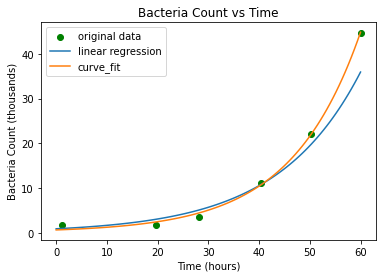

In [1214]:
plt.scatter(t[0], c[0], c=colours[0], label='original data')
tlist = np.linspace(0, 60, 100)
ylr = [alpha * math.exp(i * beta) for i in tlist]
ycf = [param[0] * math.exp(i * param[1]) + param[2] for i in tlist]
plt.plot(tlist, ylr, label='linear regression')
plt.plot(tlist, ycf, label='curve_fit')

plt.legend(loc='best')
plt.title('Bacteria Count vs Time')
plt.ylabel('Bacteria Count (thousands)')
plt.xlabel('Time (hours)')

d

Curve_fit yields a better fit. Simple linear regression, performed on the linearised exponential function, has a closed solution, so the coefficient formulas can be used. Curve_fit uses nonlinear least squares regression. Initial values for the parameters (p0) are chosen, and the parameters are refined iteratively, linearised by a first-order Taylor expansion at each iteration. Nonlinear regression allows us to add an intercept to the exponential function, which improves fit.

e

Text(0.5, 0, 'n')

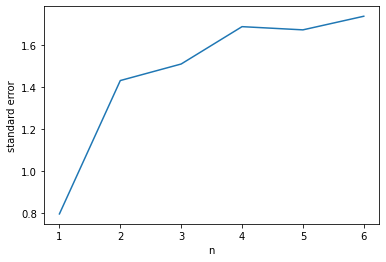

In [1215]:
T = []
C = []
se = []
ae = []
nlist = [i for i in range(1, 7)]
for n in nlist:
    p0 = [0.1, 0.1, 0.1]
    ssres = 0
    T.extend(t[n - 1])
    C.extend(c[n - 1])
    p, _ = curve_fit(cf, T, C, p0)
    lnC = [np.log(i) for i in C]
    reg = lr().fit(np.array(T).reshape(-1, 1), lnC)
    beta = reg.coef_[0]
    for i in range(len(C)):
        res = C[i] - cf(T[i], p[0], p[1], p[2])
        ssres += res**2
    se.append(math.sqrt(ssres/(6 * n - 2)))
    ae.append(abs(beta - p[1]))

plt.plot(nlist, se)
plt.ylabel('standard error')
plt.xlabel('n')

Standard error seems to gradually increase as number of data points increases in the shape of a log curve.

Text(0.5, 0, 'n')

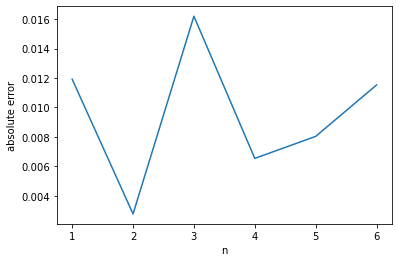

In [1216]:
plt.plot(nlist, ae)
plt.ylabel('absolute error')
plt.xlabel('n')

f

In [1217]:
print(f'c = {round(p[0], 3)}e^{round(p[1], 3)}t + {round(p[2], 3)}')

c = 0.359e^0.081t + 0.787


g

In [1218]:
c_t = cf(40, p[0], p[1], p[2])
print(f'the bacteria count at 40 hours is {round(c_t * 1000, 2)} ')

the bacteria count at 40 hours is 9794.03 


### problem 5

a

Using first-order centered approximation

Text(0.5, 0, 'T - Ta')

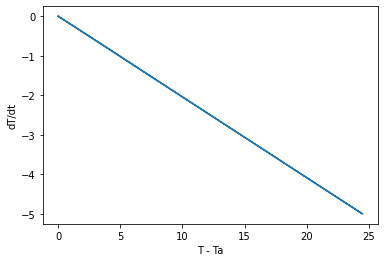

In [1219]:
t = [5 * i for i in range(6)]
T = [80, 44.5, 30, 24.1, 21.7, 20.7]
d = [0 for i in range(6)]
Td = copy.deepcopy(d)

for i in range(1, 5):
    d[i] = (T[i + 1] - T[i - 1]) / 10
    Td[i] = T[i] - 20

plt.plot(Td, d)
plt.ylabel('dT/dt')
plt.xlabel('T - Ta')

b

In [1220]:
reg = lr().fit(np.array(Td).reshape(-1, 1), d)
k = reg.coef_[0]
print(f'k = {round(k, 3)}')

k = -0.204


c

Text(0.5, 0, 'time (min)')

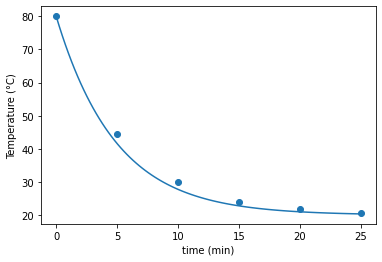

In [1221]:
def model(t):
    # the following expression was obtained by solving the differential equation by hand, and substituting (t = 0, T = 80)
    return 60 * np.exp(k * t) + 20

tlist = np.linspace(0, 25, 100)
Tlist = model(tlist)
plt.scatter(t, T)
plt.plot(tlist, Tlist)
plt.ylabel('Temperature (°C)')
plt.xlabel('time (min)')